In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import h5py
from tqdm.notebook import tqdm_notebook as tqdm
from os import listdir
import seaborn as sns

In [2]:
def listdir_nohidden(path):
    for f in listdir(path):
        if not f.startswith('.'):
            yield f

In [3]:
msun = 1.98847e33
folder_path = "/Users/utkarsh/PycharmProjects/fmodes/posterior_fmodes/"
names = list(listdir_nohidden(folder_path))
df = pd.DataFrame({}, columns = ["mass", "radius", "fmode"])

In [4]:
for eos_name in tqdm(names):
        path = folder_path + eos_name 
        new = np.genfromtxt(path, delimiter=',', skip_header = 1)
        df = df.append(pd.DataFrame(new, columns=df.columns), ignore_index=True)

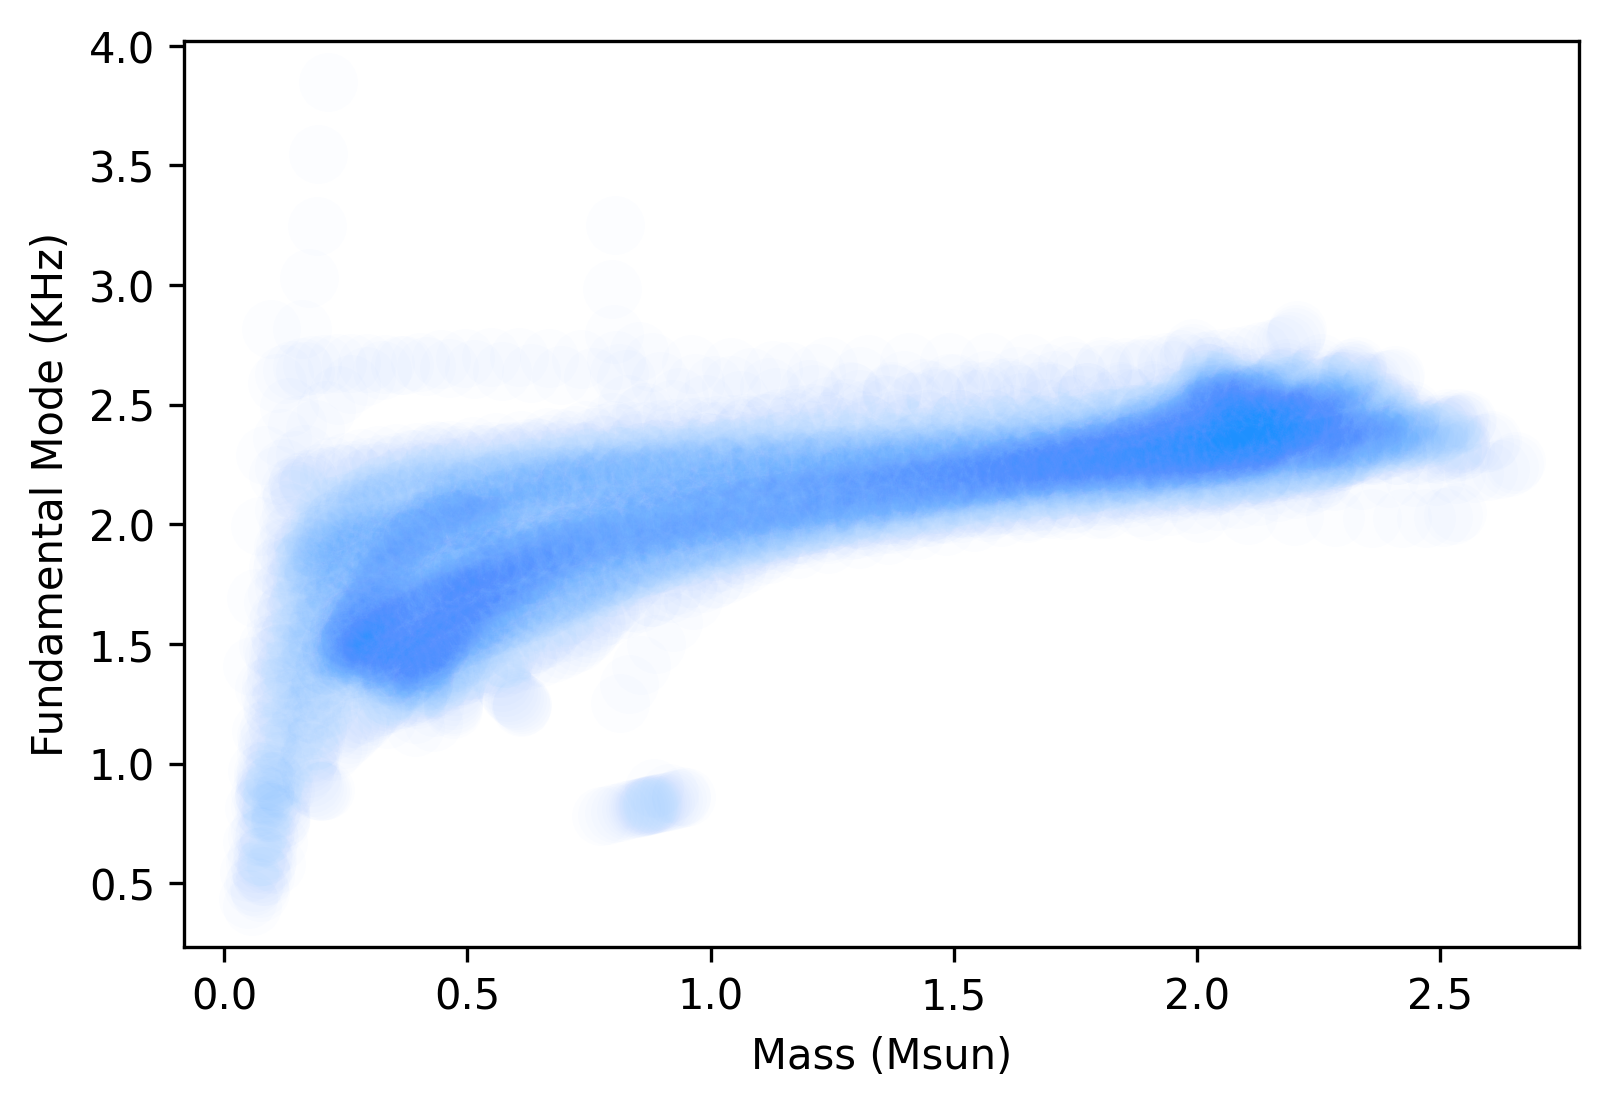

In [5]:
plt.figure(dpi = 300)
plt.scatter(df.mass/msun, df.fmode/1e3, s = 200, 
            color = "dodgerblue", alpha = 0.01, edgecolor = "white")
plt.xlabel("Mass (Msun)")
plt.ylabel("Fundamental Mode (KHz)")
plt.show()

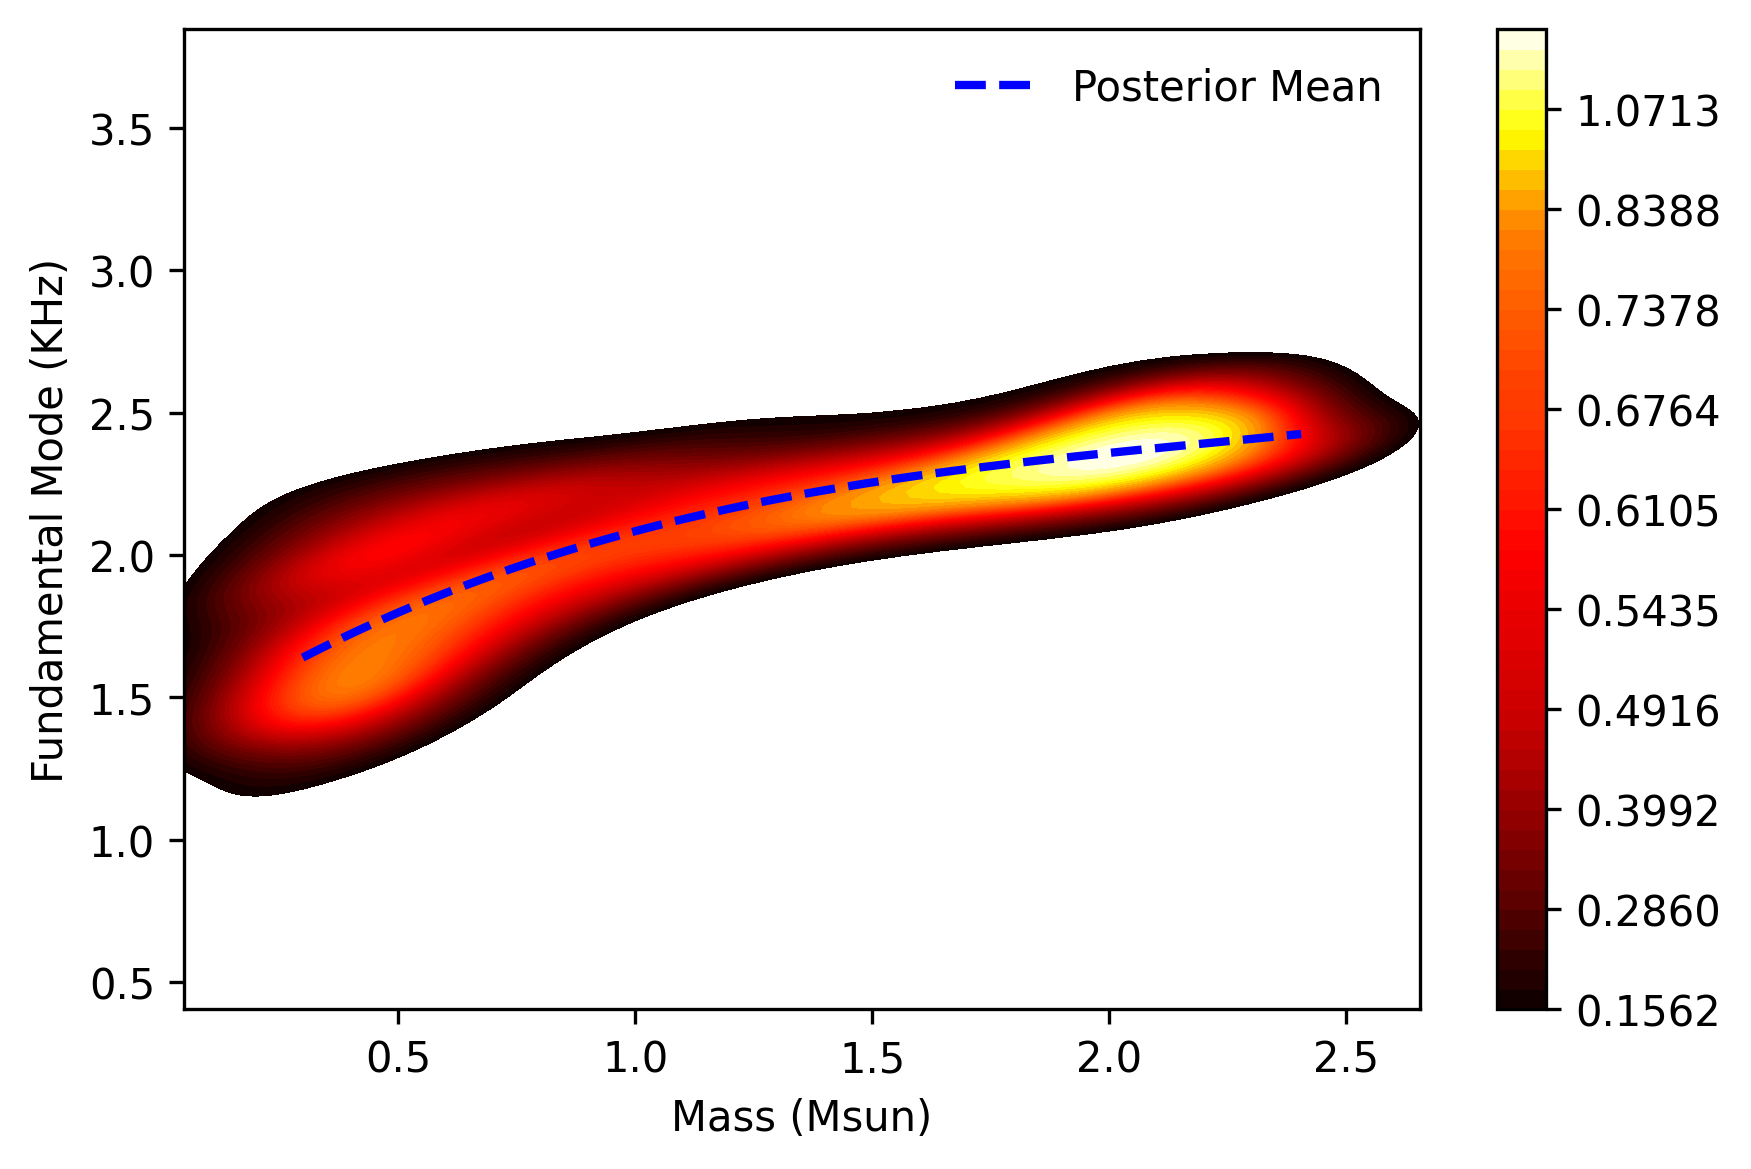

In [6]:
# plt.figure(dpi = 300)
# plt.hist2d(df.mass/msun, df.fmode/1e3, bins=100, cmap = plt.cm.inferno)
# plt.xlabel("Mass (MSun)")
# plt.ylabel("Fundamental Mode (KHz)")
# cbar = plt.colorbar()
# cbar.ax.set_ylabel('Counts')
# plt.tight_layout()
# plt.show()

z = np.polyfit(df.mass/msun, df.fmode/1e3, deg = 3)
p = np.poly1d(z)
x = np.linspace(min(df.mass/msun) + 0.25, max(df.mass/msun) - 0.25, 100)

data_ = np.array([df.mass/msun, df.fmode/1e3]).T
data = pd.DataFrame(data_, columns = ['X','Y'])
plt.figure(figsize=(6, 4), dpi = 300)
sns.kdeplot(data = data, shade=True, x='X', y='Y', cmap = "hot", cut = 0, cbar = True, thresh=0.1,
           bw_adjust=1, levels = 50)
plt.plot(x, p(x),"blue", linewidth = 2, label = "Posterior Mean", linestyle = "dashed")
plt.xlabel("Mass (Msun)")
plt.ylabel("Fundamental Mode (KHz)")
plt.legend(frameon = False)
plt.tight_layout()
plt.show()

In [7]:
now = "eos_10"
(now + ".csv") in names

True